In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time
import sqlite3
conn = sqlite3.connect("f1_9472.db")

def get_data(url):
    return pd.DataFrame(requests.get(url).json())

### plotting telemetry live

In [16]:
race_start = '2024-03-02T15:00:00'
race_end_2 = '2024-03-02T15:20:00' 
race_end = '2024-03-02T17:00:00' 
time_format = '%Y-%m-%dT%H:%M:%S'

In [3]:
session_key = 9472
driver_number = 1

In [7]:
time_lower = datetime.strptime(race_start, time_format)
time_lower = datetime.strptime(race_start, time_format)
time_upper = time_lower + timedelta(seconds = 10)

In [55]:
cardata_df = pd.DataFrame()
laps_df = pd.DataFrame()
lap_number = 1
lap_start = pd.to_datetime(race_start)

2024-03-02 15:00:00
2024-03-02 15:00:10
2024-03-02 15:00:20
2024-03-02 15:00:30
2024-03-02 15:00:40
2024-03-02 15:00:50
2024-03-02 15:01:00
2024-03-02 15:01:10
2024-03-02 15:01:20
2024-03-02 15:01:30
2024-03-02 15:01:40
2024-03-02 15:01:50
2024-03-02 15:02:00
2024-03-02 15:02:10
2024-03-02 15:02:20
2024-03-02 15:02:30
2024-03-02 15:02:40
2024-03-02 15:02:50
2024-03-02 15:03:00
2024-03-02 15:03:10
2024-03-02 15:03:20
2024-03-02 15:03:30
2024-03-02 15:03:40
2024-03-02 15:03:50
2024-03-02 15:04:00
2024-03-02 15:04:10
2024-03-02 15:04:20
2024-03-02 15:04:30
2024-03-02 15:04:40
2024-03-02 15:04:50
2024-03-02 15:05:00
2024-03-02 15:05:10
2024-03-02 15:05:20
2024-03-02 15:05:20 2024-03-02T15:05:20.099000 2


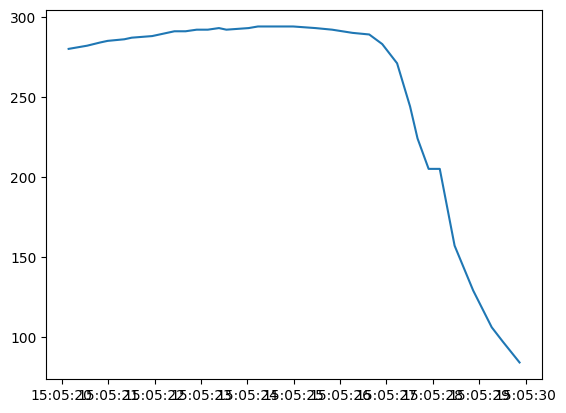

2024-03-02 15:05:30


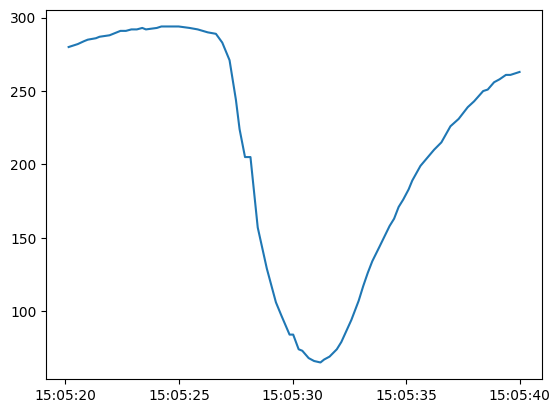

2024-03-02 15:05:40


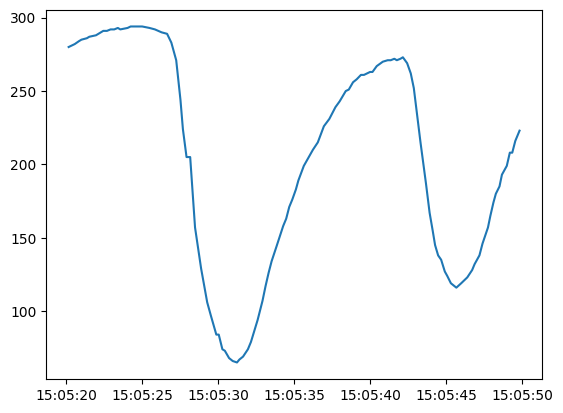

2024-03-02 15:05:50


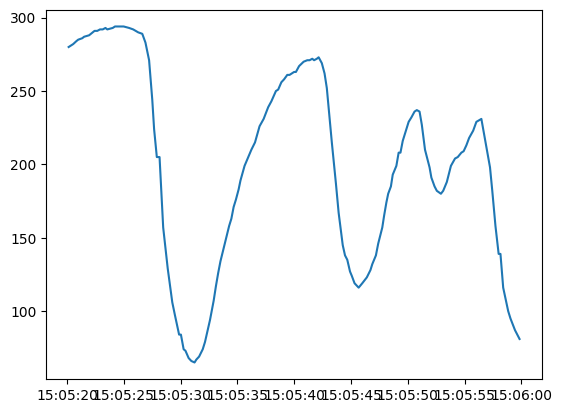

2024-03-02 15:06:00


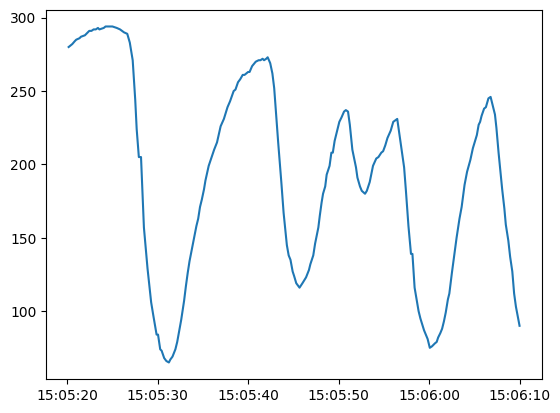

2024-03-02 15:06:10


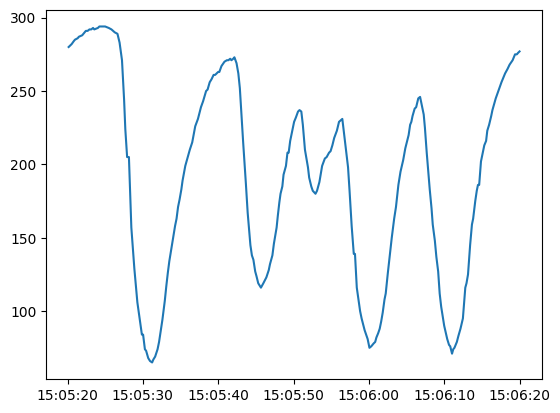

2024-03-02 15:06:20


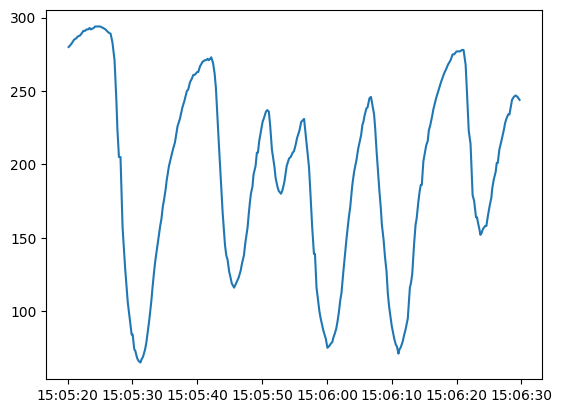

2024-03-02 15:06:30


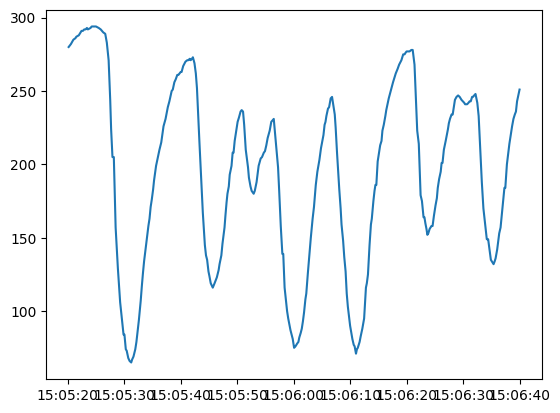

2024-03-02 15:06:40


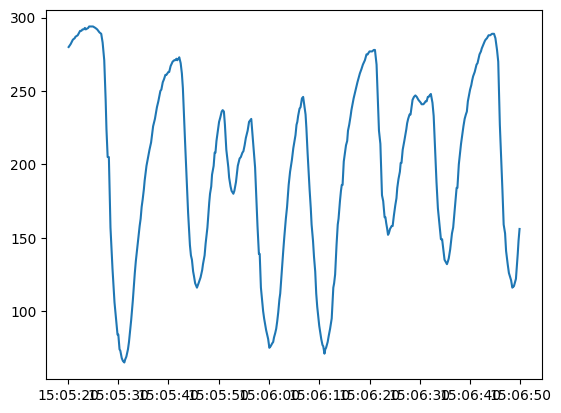

2024-03-02 15:06:50
2024-03-02 15:06:50 2024-03-02T15:06:56.378000 3


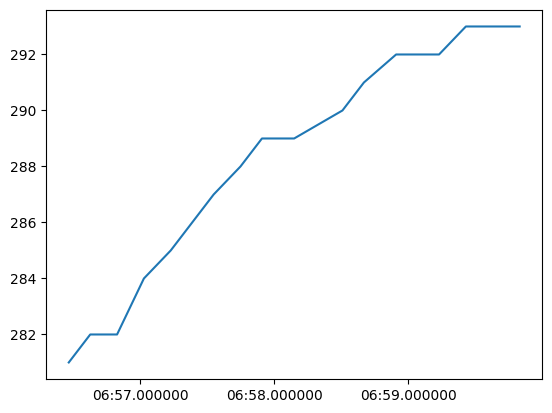

2024-03-02 15:07:00


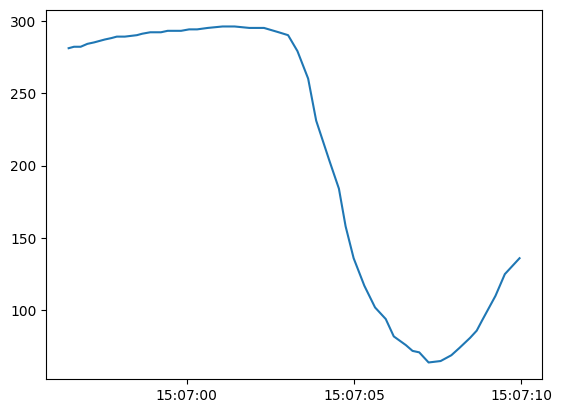

2024-03-02 15:07:10


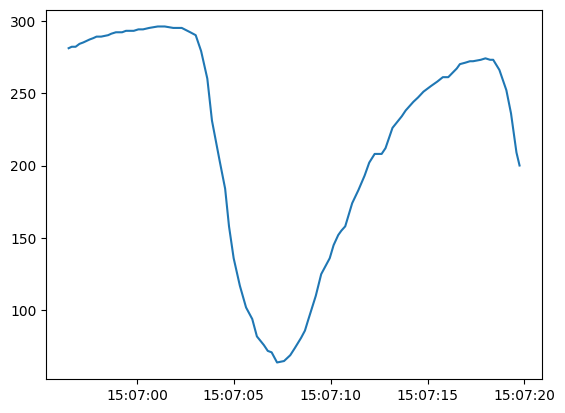

2024-03-02 15:07:20


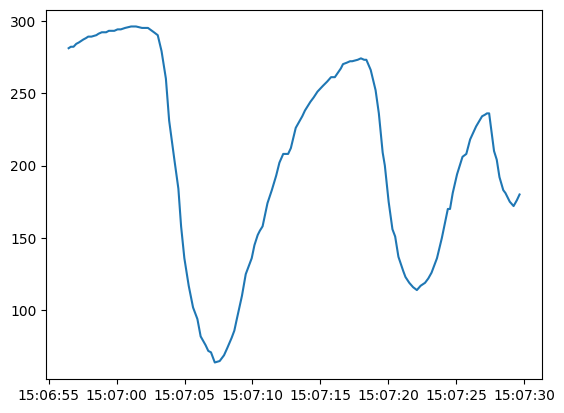

2024-03-02 15:07:30


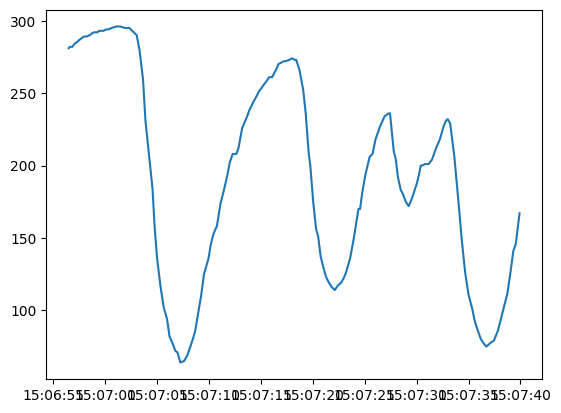

2024-03-02 15:07:40


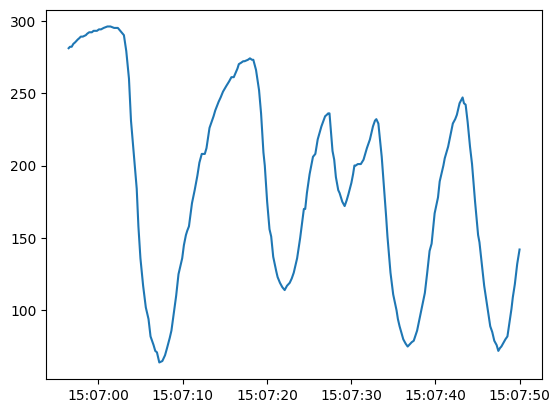

2024-03-02 15:07:50


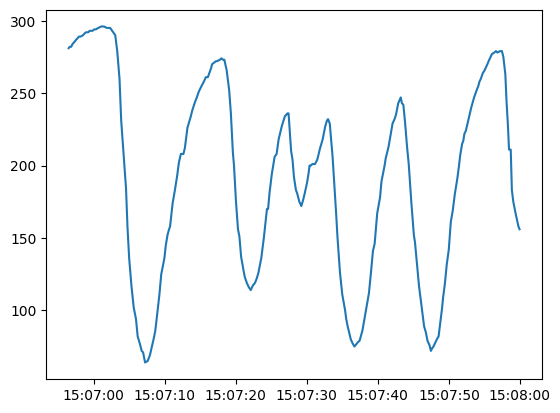

2024-03-02 15:08:00


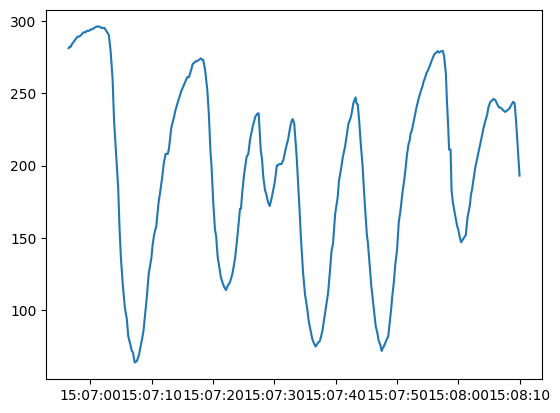

2024-03-02 15:08:10


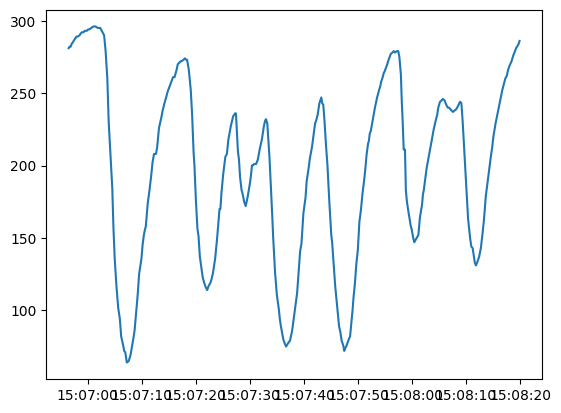

2024-03-02 15:08:20


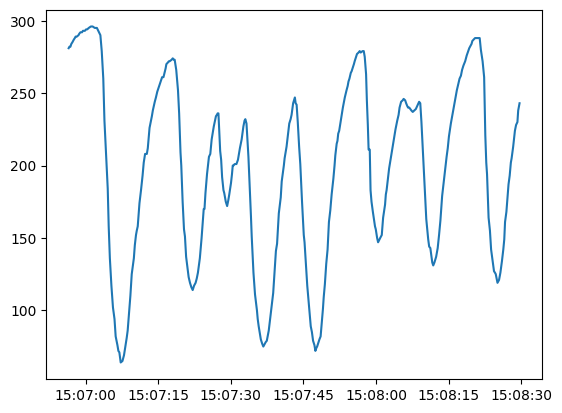

2024-03-02 15:08:30
2024-03-02 15:08:30 2024-03-02T15:08:33.130000 4


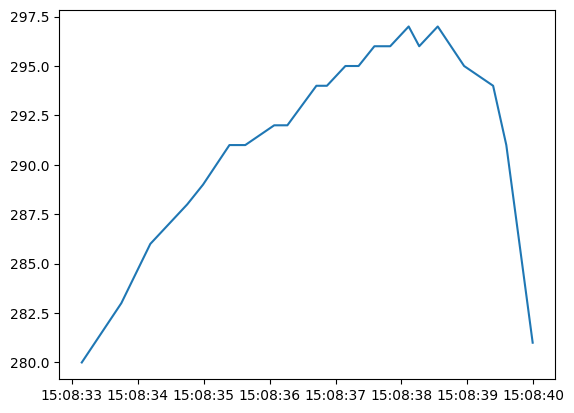

2024-03-02 15:08:40


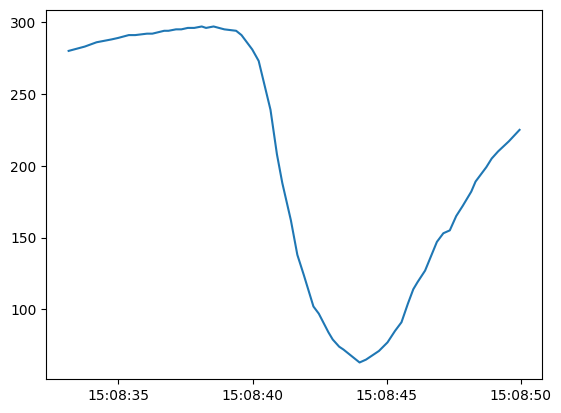

2024-03-02 15:08:50


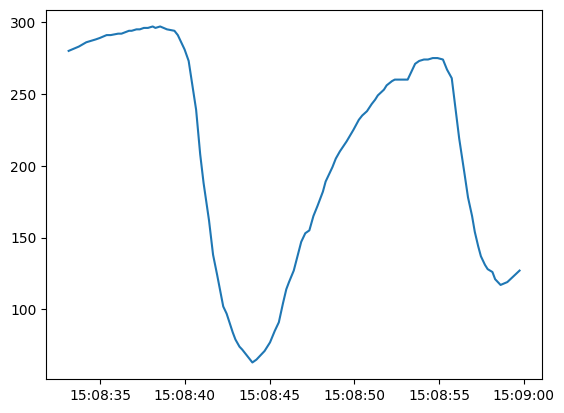

2024-03-02 15:09:00


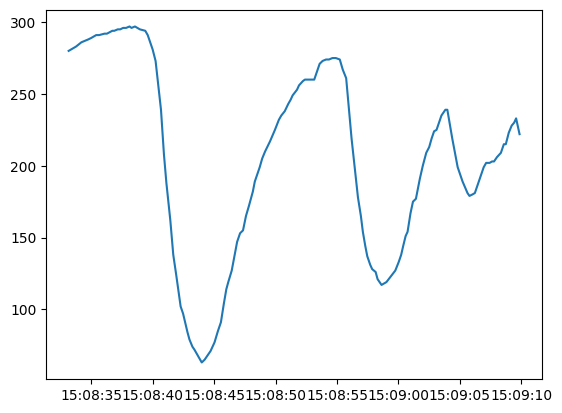

2024-03-02 15:09:10


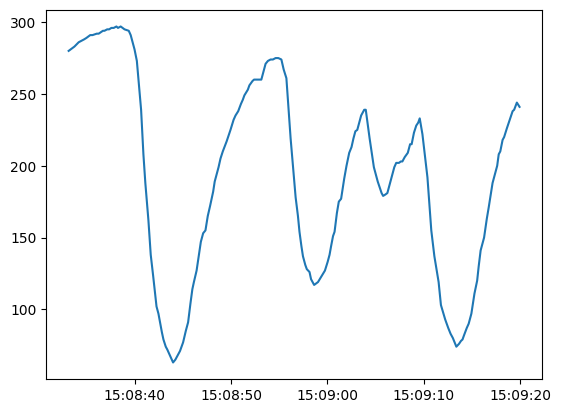

2024-03-02 15:09:20


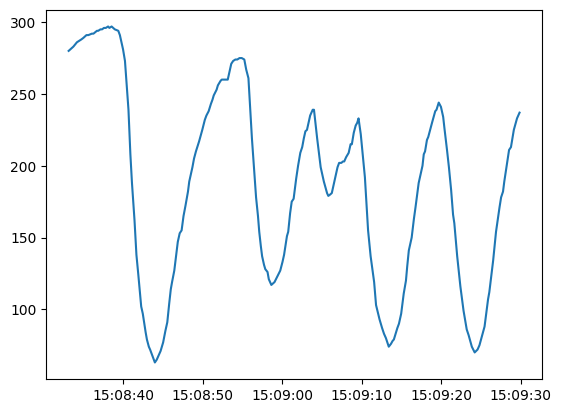

2024-03-02 15:09:30


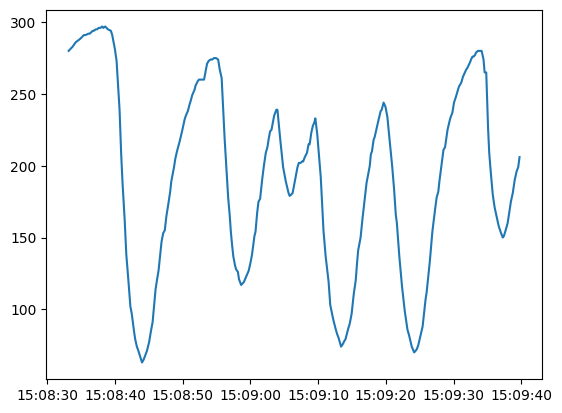

2024-03-02 15:09:40


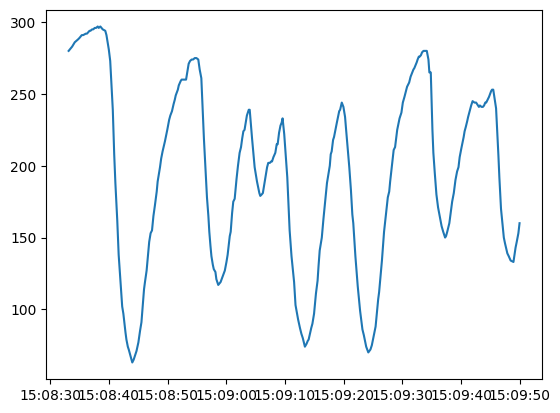

2024-03-02 15:09:50


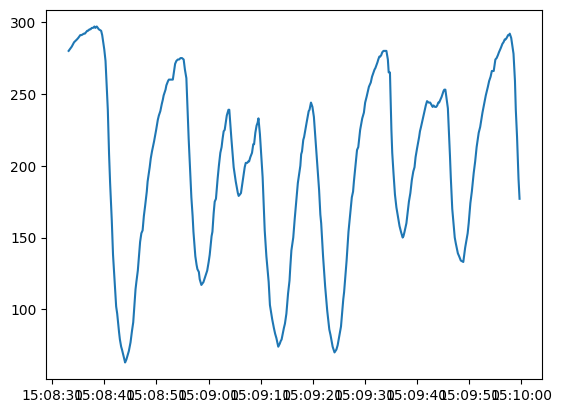

2024-03-02 15:10:00
2024-03-02 15:10:00 2024-03-02T15:10:09.704000 5


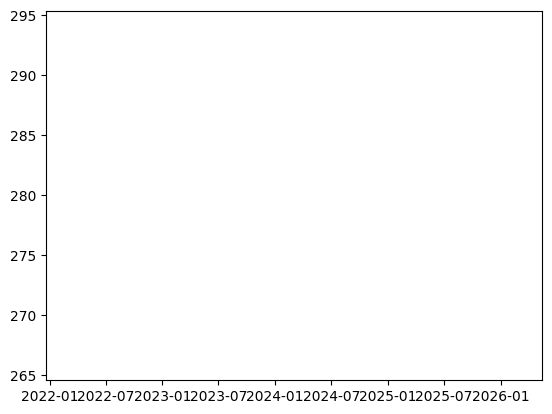

2024-03-02 15:10:10


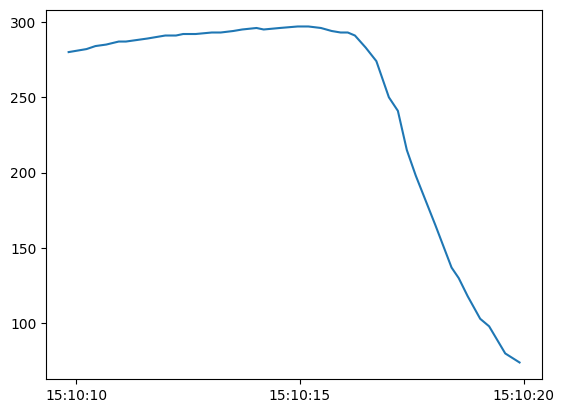

2024-03-02 15:10:20


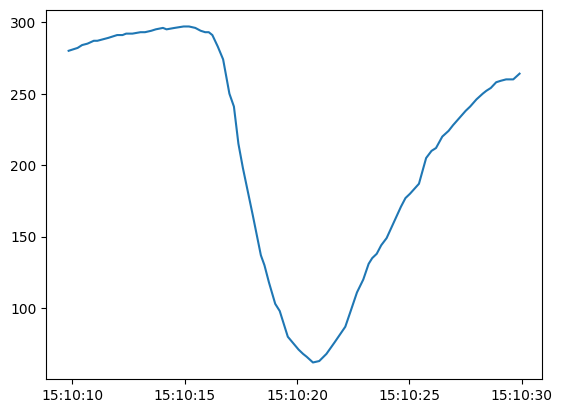

2024-03-02 15:10:30


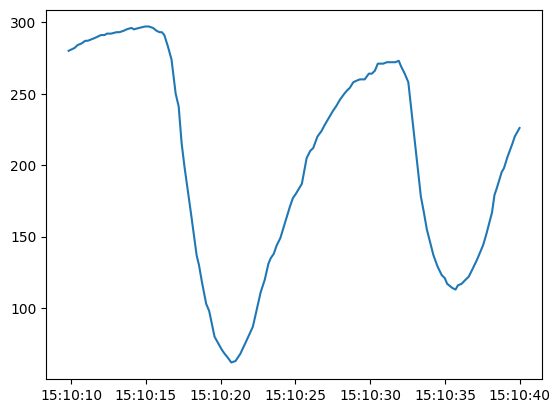

2024-03-02 15:10:40


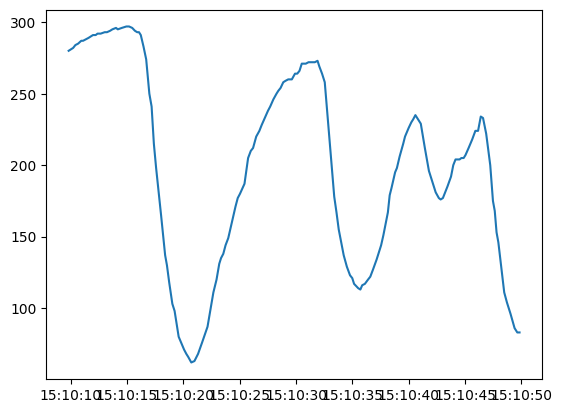

2024-03-02 15:10:50


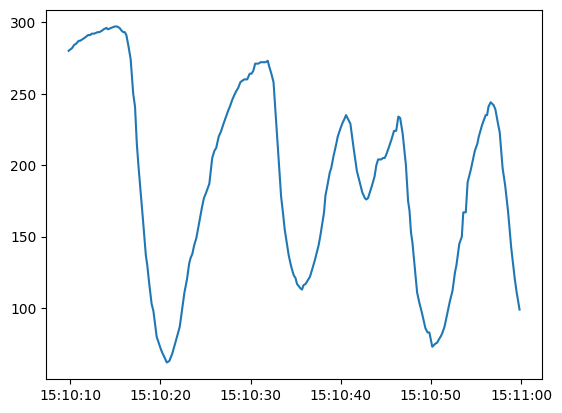

2024-03-02 15:11:00


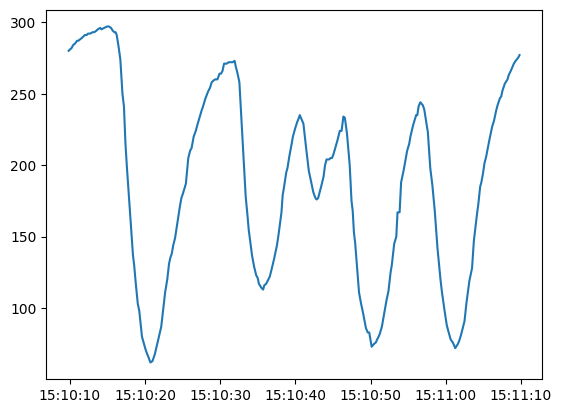

2024-03-02 15:11:10


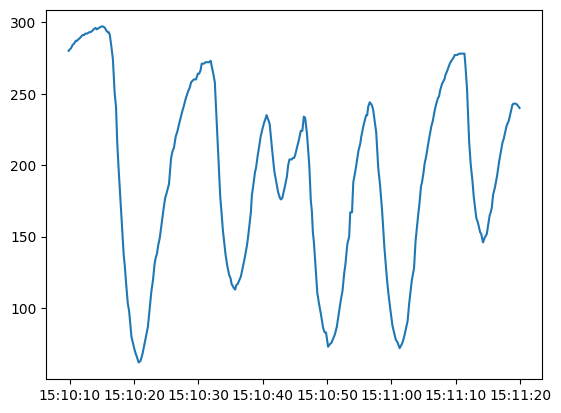

2024-03-02 15:11:20


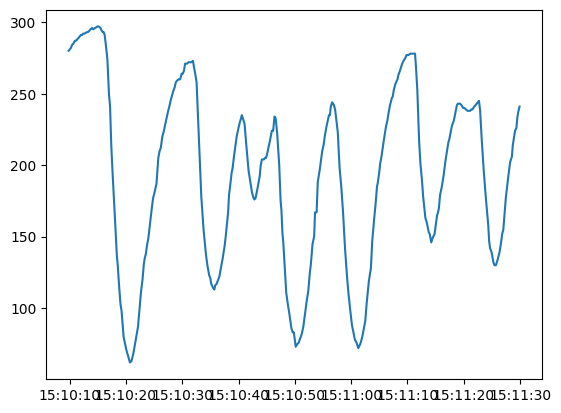

2024-03-02 15:11:30


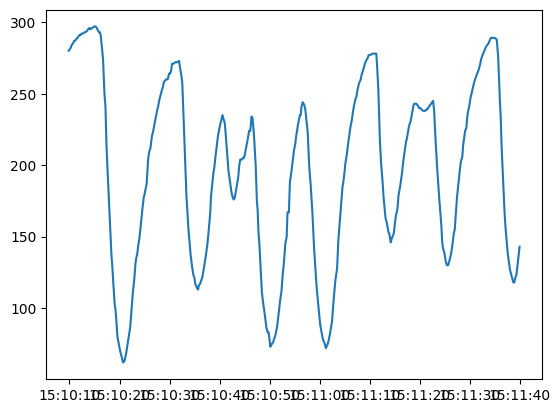

2024-03-02 15:11:40
2024-03-02 15:11:40 2024-03-02T15:11:46.978000 6


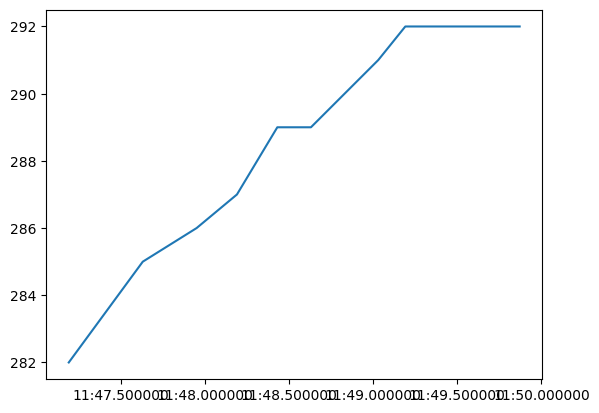

2024-03-02 15:11:50


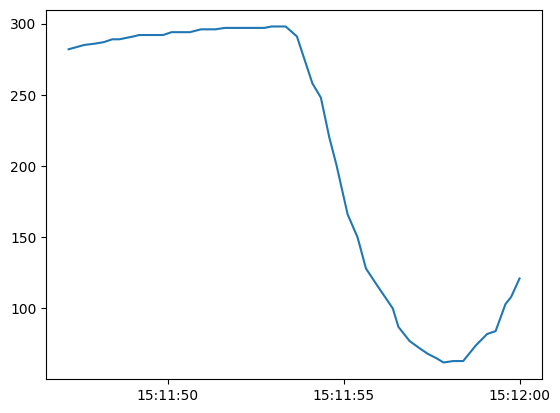

2024-03-02 15:12:00


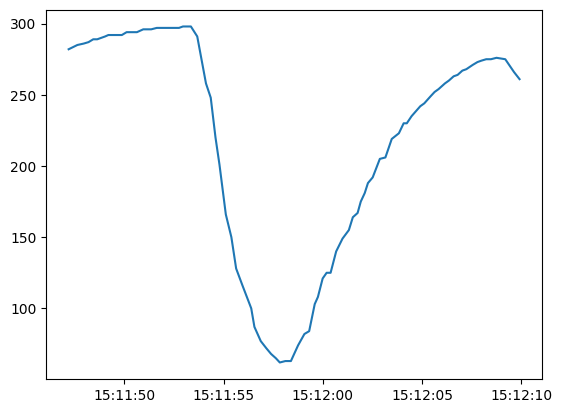

2024-03-02 15:12:10


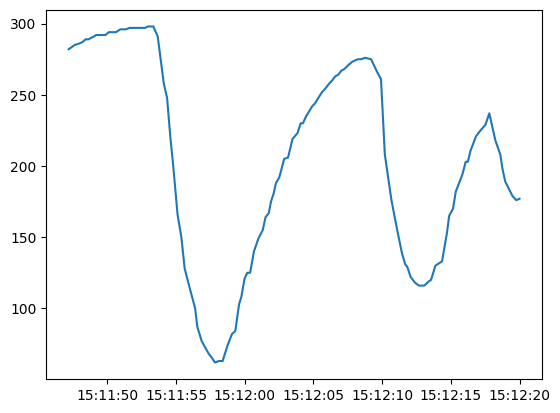

2024-03-02 15:12:20


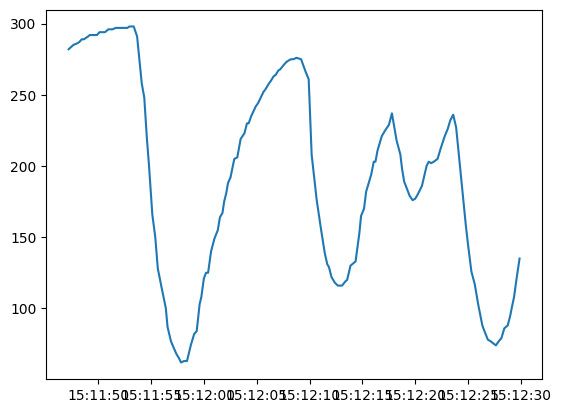

2024-03-02 15:12:30


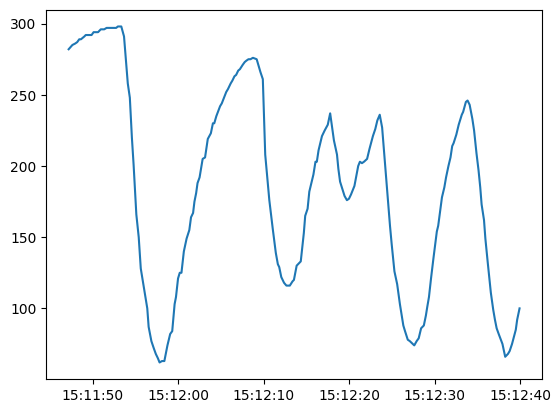

2024-03-02 15:12:40


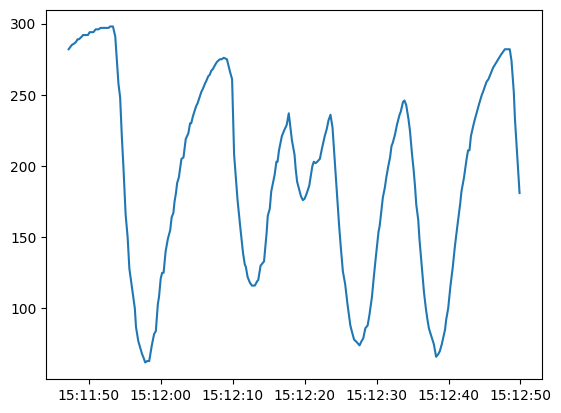

2024-03-02 15:12:50


KeyboardInterrupt: 

In [57]:
for timestamp in pd.date_range(race_start, race_end_2, freq = '10s'):

    cardata_url = f'''https://api.openf1.org/v1/car_data?driver_number={driver_number}&session_key={session_key}&date>={timestamp.strftime(time_format)}&date<{(timestamp+timedelta(seconds = 10)).strftime(time_format)}'''
    laps_url = f'''https://api.openf1.org/v1/laps?session_key={session_key}&driver_number={driver_number}&date_start>={timestamp.strftime(time_format)}&date_start<{(timestamp+timedelta(seconds = 10)).strftime(time_format)}'''
    position_url = f'''https://api.openf1.org/v1/position?driver_number={driver_number}&session_key={session_key}&date>={timestamp.strftime(time_format)}&date<{(timestamp+timedelta(seconds = 10)).strftime(time_format)}'''
    print(timestamp)
    
    cardata_df_ = get_data(cardata_url)
    cardata_df_.date = pd.to_datetime(cardata_df_.date)
    cardata_df = pd.concat([cardata_df, cardata_df_])
    
    new_laps = get_data(laps_url)
    if len(new_laps):
        laps_df = pd.concat([laps_df, new_laps])
        lap_number = new_laps['lap_number'][0]
        lap_start = new_laps['date_start'][0]
        print(timestamp, lap_start, lap_number)
    current_lap_cardata = cardata_df[cardata_df.date > lap_start]
    if lap_number > 1:
        plt.plot(current_lap_cardata.date, current_lap_cardata.speed)
        plt.show()
    
    # time.sleep(0.5)


In [53]:
cardata_df.date.iloc[0]

'2024-03-02T15:00:00.068000'

### dash app

In [3]:
pd.read_sql('select * from laps where driver_number = 1', conn)

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,date_end
0,1229,9472,1,234.0,250,251.0,2024-03-02 15:00:00,nan,False,nan,41.266,23.616,"[2064, 2048, 2049, 2049, 2051, 2051, 2049, 204...","[2051, 2051, 2051, 2049, 2049, 2049, 2049, 205...","[2048, 2048, 2048, 2049, 2048, 2048, 2049]",1,NaT
1,1229,9472,1,232.0,248,287.0,2024-03-02 15:05:20.099000,96.296,False,30.916,41.661,23.719,"[2049, 2049, 2049, 2049, 2048, 2051, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",2,2024-03-02 15:06:56.395000
2,1229,9472,1,231.0,243,290.0,2024-03-02 15:06:56.378000,96.753,False,30.999,41.966,23.788,"[None, 2049, 2049, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",3,2024-03-02 15:08:33.131000
3,1229,9472,1,233.0,253,nan,2024-03-02 15:08:33.130000,96.647,False,30.931,41.892,23.824,"[2048, 2049, 2049, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049]",4,2024-03-02 15:10:09.777000
4,1229,9472,1,231.0,245,289.0,2024-03-02 15:10:09.704000,97.173,False,31.255,42.056,23.862,"[None, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2049]",5,2024-03-02 15:11:46.877000
5,1229,9472,1,nan,247,296.0,2024-03-02 15:11:46.978000,97.092,False,31.041,42.187,23.864,"[2049, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2049, 2049]",6,2024-03-02 15:13:24.070000
6,1229,9472,1,232.0,242,291.0,2024-03-02 15:13:24.080000,97.038,False,31.015,42.118,23.905,"[2048, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049]",7,2024-03-02 15:15:01.118000
7,1229,9472,1,231.0,250,nan,2024-03-02 15:15:01.132000,97.024,False,31.041,42.077,23.906,"[2049, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",8,2024-03-02 15:16:38.156000
8,1229,9472,1,nan,243,292.0,2024-03-02 15:16:38.044000,97.229,False,31.1,42.166,23.963,"[None, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049]",9,2024-03-02 15:18:15.273000
9,1229,9472,1,232.0,244,293.0,2024-03-02 15:18:15.404000,96.96,False,30.986,42.009,23.965,"[2048, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",10,2024-03-02 15:19:52.364000
